# Linear_Regression

In [1]:
import numpy as np
from sklearn import linear_model, datasets, tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

## Prepare data

### First we will prepare some data for demonstrating linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data: $$y = \frac{x}{2}+sin(x)+\epsilon$$ Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise. 

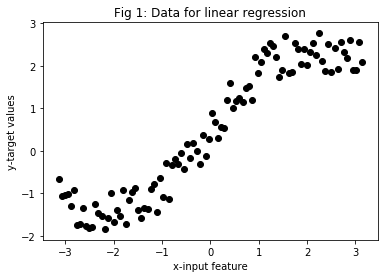

In [2]:
n = 100
x = np.linspace(-np.pi, np.pi , n)
y = x/2 + np.sin(x) + np.random.random(x.shape)
plt.scatter(x,y, color = 'black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

### Split the data for training, validation and testing  manually

In [3]:
random_indices = np.random.permutation(n)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

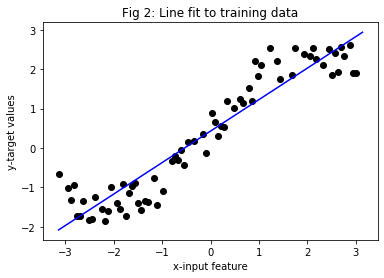

In [4]:
model = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

In [5]:
mean_val_error = mse(y_val, model.predict(x_val.reshape(len(x_val),1)))
mean_test_error = mse(y_test, model.predict(x_test.reshape(len(x_test),1)))

print('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  0.32807668561558756 
Test MSE:  0.3769927690211424


### Use train_test_split() function from sklearn.model_selection to split the data for training and testing 

#### Note: train_test_split() splits the data into two parts as per specified train_size or test_size. Thus, in the case where validation is necessary,  one may use train_test_split twice i.e. split the orignal data and resplit one part to from two more parts forming three parts in total for training, validation and testing.

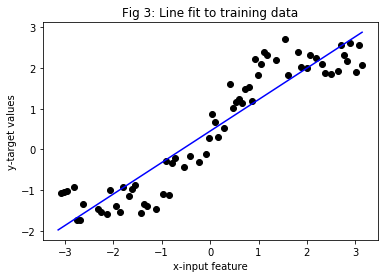

In [6]:
from sklearn.model_selection import train_test_split as tts

x_train1,x_test1,y_train1,y_test1 = tts(x, y, test_size=0.33, random_state=42)
model1 = linear_model.LinearRegression() #Create a least squared error linear regression object

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting1 = np.matrix(x_train1.reshape(len(x_train1),1))
y_train_for_line_fitting1 = np.matrix(y_train1.reshape(len(y_train1),1))

#Fit the line to the training data
model1.fit(x_train_for_line_fitting1, y_train_for_line_fitting1)

#Plot the line
plt.scatter(x_train1, y_train1, color='black')
plt.plot(x.reshape((len(x),1)),model1.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 3: Line fit to training data')
plt.show()

In [7]:
mean_sq_err = mse(y_test1, model1.predict(x_test1.reshape(len(x_test1),1)))
print('Test MSE: ', mean_sq_err)

Test MSE:  0.28015488360856
